# Niebędne biblioteki


In [1]:
import numpy as np
import pandas as pd
import os, shutil
import warnings
warnings.filterwarnings("ignore")
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
from pathlib import Path

# Podział na dane, treningowe, testowe i walidacyjne

In [83]:
path_file_cat = Path('Dog_Cat/Cat/')
path_file_dog = Path('Dog_Cat/Dog/')

base_dir = 'Kaggle/'
# Train folder
Train_dir = os.path.join(base_dir, 'Train')

# cat folder in train
cat_train_dir = os.path.join(Train_dir, 'cat')

# dog folder in train
dog_train_dir = os.path.join(Train_dir, 'dog')

# Test Folder
Test_dir = os.path.join(base_dir, 'Test')

# cat folder in test
cat_test_dir = os.path.join(Test_dir, 'cat')

# dog folder in test
dog_test_dir = os.path.join(Test_dir, 'dog')

# validation folder
valid_dir = os.path.join(base_dir, 'validation')

# cat folder in validation
cat_val_dir = os.path.join(valid_dir, 'cat')

# dog folder in validation
dog_val_dir = os.path.join(valid_dir, 'dog')

In [35]:
# Creating folders
os.mkdir(base_dir)

# Train folder
os.mkdir(Train_dir)

# cat folder in train
os.mkdir(cat_train_dir)

# dog folder in train
os.mkdir(dog_train_dir)

# Test Folder
os.mkdir(Test_dir)

# cat folder in test
os.mkdir(cat_test_dir)

# dog folder in test
os.mkdir(dog_test_dir)

# validation folder
os.mkdir(valid_dir)

# cat folder in validation
os.mkdir(cat_val_dir)

# dog folder in validation
os.mkdir(dog_val_dir)

In [36]:
train_list_cat_file = [f'{i}.jpg' for i in range(6500)]
train_list_dog_file = [f'{i}.jpg' for i in range(6500)]

test_list_cat_file = [f'{i}.jpg' for i in range(6500, 9500)]
test_list_dog_file = [f'{i}.jpg' for i in range(6500, 9500)]

val_list_cat_file = [f'{i}.jpg' for i in range(9500, 12500)]
val_list_dog_file = [f'{i}.jpg' for i in range(9500, 12500)]

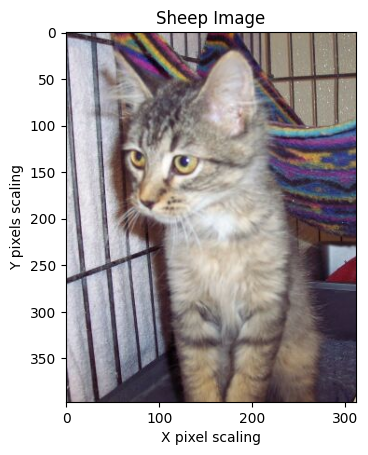

In [176]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.title("Sheep Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = mpimg.imread(Path('Dog_Cat/Cat/2.jpg'))
plt.imshow(image)
plt.show()

In [172]:
# organaize cat and dog in train folders
# cat

print
for filename in train_list_cat_file:
    src = os.path.join(path_file_cat, filename)
    dst = os.path.join(cat_train_dir, filename)
    try:
        shutil.copyfile(src, dst)
    except FileNotFoundError:
        pass
    
# dog
for filename in train_list_dog_file:
    src = os.path.join(path_file_dog, filename)
    dst = os.path.join(dog_train_dir, filename)
    try:
        shutil.copyfile(src, dst)
    except FileNotFoundError:
        pass
    
# organaize cat and dog in test folders
# cat
for filename in test_list_cat_file:
    src = os.path.join(path_file_cat, filename)
    dst = os.path.join(cat_test_dir, filename)
    try:
        shutil.copyfile(src, dst)
    except FileNotFoundError:
        pass
    
# dog
for filename in test_list_dog_file:
    src = os.path.join(path_file_dog, filename)
    dst = os.path.join(dog_test_dir, filename)
    try:
        shutil.copyfile(src, dst)
    except FileNotFoundError:
        pass
    
# organaize cat and dog in validation folders
# cat
for filename in val_list_cat_file:
    src = os.path.join(path_file_cat, filename)
    dst = os.path.join(cat_val_dir, filename)
    try:
        shutil.copyfile(src, dst)
    except FileNotFoundError:
        pass
    
# dog
for filename in val_list_dog_file:
    src = os.path.join(path_file_dog, filename)
    dst = os.path.join(dog_val_dir, filename)
    try:
        shutil.copyfile(src, dst)
    except FileNotFoundError:
        pass

In [173]:
print("number of cat img in train folder: ", len(os.listdir(cat_train_dir)))
print("number of dog img in train folder: ", len(os.listdir(dog_train_dir)))
print("number of cat img in test folder: ", len(os.listdir(cat_test_dir)))
print("number of dog img in test folder: ", len(os.listdir(dog_test_dir)))
print("number of cat img in validation folder: ", len(os.listdir(cat_val_dir)))
print("number of dog img in validation folder: ", len(os.listdir(dog_val_dir)))

number of cat img in train folder:  6499
number of dog img in train folder:  6230
number of cat img in test folder:  3000
number of dog img in test folder:  2790
number of cat img in validation folder:  3000
number of dog img in validation folder:  1557


# Tworzenie architektury modelu

In [177]:
from keras import layers 
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))   
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2023-10-23 19:18:43.105251: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-23 19:18:43.105382: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-23 19:18:43.106738: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-23 19:18:43.218283: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 19:18:44.380574: W tensorflow/compiler/

In [178]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [180]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [181]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest') 

test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    directory=Train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    seed=42)

validation_generator = test_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    seed=42)
test_generator = test_datagen.flow_from_directory(
    directory=Test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary',
    seed=42)

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

Found 12729 images belonging to 2 classes.
Found 4557 images belonging to 2 classes.
Found 5790 images belonging to 2 classes.


In [182]:
for data_batch, labels_batch in train_generator:
    print('data batch shape', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data batch shape (20, 150, 150, 3)
labels batch shape (20,)


In [183]:
history = model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID)

Epoch 1/25


2023-10-23 19:20:36.545021: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-10-23 19:20:41.825917: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb9e8976400 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-23 19:20:41.825974: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-10-23 19:20:41.839436: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-23 19:20:41.927626: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


636/636 [==============================] - 72s 92ms/step - loss: 0.6720 - acc: 0.5724 - val_loss: 0.6458 - val_acc: 0.6174
Epoch 2/25
636/636 [==============================] - 55s 87ms/step - loss: 0.6046 - acc: 0.6672 - val_loss: 0.5809 - val_acc: 0.6989
Epoch 3/25
636/636 [==============================] - 52s 82ms/step - loss: 0.5648 - acc: 0.7038 - val_loss: 0.5128 - val_acc: 0.7548
Epoch 4/25
636/636 [==============================] - 53s 84ms/step - loss: 0.5406 - acc: 0.7249 - val_loss: 0.4622 - val_acc: 0.7896
Epoch 5/25
636/636 [==============================] - 50s 79ms/step - loss: 0.5202 - acc: 0.7431 - val_loss: 0.4710 - val_acc: 0.7841
Epoch 6/25
636/636 [==============================] - 49s 77ms/step - loss: 0.4971 - acc: 0.7563 - val_loss: 0.4365 - val_acc: 0.8013
Epoch 7/25
636/636 [==============================] - 50s 79ms/step - loss: 0.4838 - acc: 0.7659 - val_loss: 0.4448 - val_acc: 0.7956
Epoch 8/25
636/636 [==============================] - 50s 78ms/step - los

In [184]:
model.save_weights('first_try.h5', overwrite=True)

2023-10-23 19:43:43.714919: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12845056 exceeds 10% of free system memory.


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


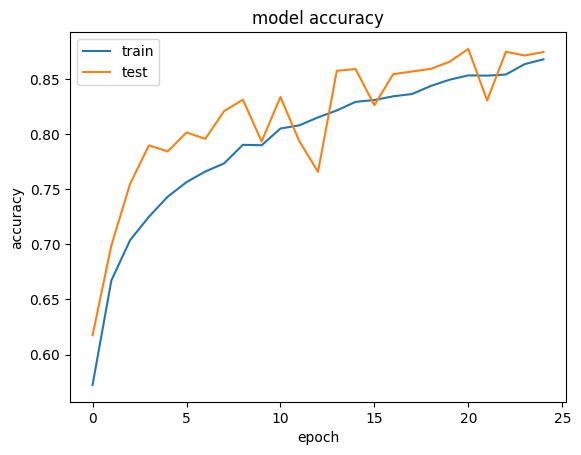

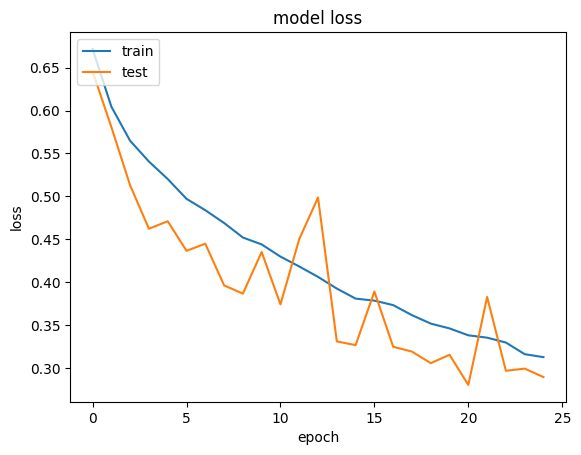

In [185]:
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [186]:
model.evaluate_generator(generator=validation_generator,
steps=STEP_SIZE_VALID)

[0.28947713971138, 0.87466961145401]

# Zapisanie oraz odczyt modelu


In [187]:
saved_model = model.to_json()
import json
with open('model_architecture.json', 'w') as outfile:
    json.dump(saved_model, outfile)

In [188]:
from keras.models import model_from_json
loaded_model = model_from_json(json.load(open('model_architecture.json', 'r')))

In [189]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0